In [17]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import scipy

%matplotlib inline

In [2]:
fig = plt.figure()

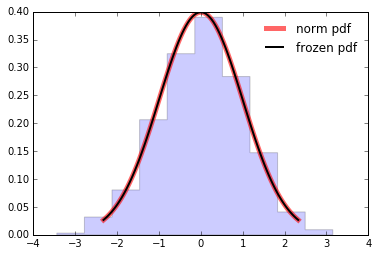

In [4]:
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
rv = norm()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
r = norm.rvs(size=1000)
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.show()

In [45]:
def get_k_samples(k, n=10000):
    samples = []
    for i in range(k):
        loc, scale = 0, 1
        norm_rv = norm(loc, scale)
        sample = norm_rv.rvs(n)
        samples.append(sample*sample)
    return samples

In [52]:
samples = np.sum(get_k_samples(5),axis=0)

(array([ 0.0178,  0.0614,  0.104 ,  0.137 ,  0.15  ,  0.1432,  0.1452,
         0.147 ,  0.1496,  0.1196,  0.1202,  0.0954,  0.0902,  0.0838,
         0.0724,  0.0584,  0.05  ,  0.045 ,  0.0352,  0.0246,  0.0254,
         0.019 ,  0.0152,  0.015 ,  0.0142,  0.0114,  0.0104,  0.0064,
         0.0058,  0.0066,  0.0018,  0.0032,  0.0032,  0.0024,  0.001 ,
         0.0012,  0.0028,  0.0012,  0.0002,  0.0004,  0.0008,  0.0002,
         0.0004,  0.0004,  0.0002,  0.0006,  0.0002,  0.0002,  0.0002]),
 array([  0.04020643,   0.54020643,   1.04020643,   1.54020643,
          2.04020643,   2.54020643,   3.04020643,   3.54020643,
          4.04020643,   4.54020643,   5.04020643,   5.54020643,
          6.04020643,   6.54020643,   7.04020643,   7.54020643,
          8.04020643,   8.54020643,   9.04020643,   9.54020643,
         10.04020643,  10.54020643,  11.04020643,  11.54020643,
         12.04020643,  12.54020643,  13.04020643,  13.54020643,
         14.04020643,  14.54020643,  15.04020643,  15

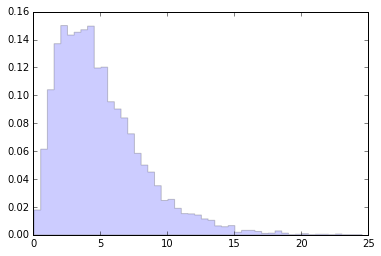

In [53]:
plt.hist(samples, normed=True, histtype='stepfilled', alpha=0.2,
         bins=np.arange(min(samples), max(samples) + 0.5, 0.5))

In [54]:
import pandas as pd

In [57]:
data = pd.read_csv("water.txt", delimiter='\t')

In [58]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


(array([  2.,   6.,   5.,   8.,   9.,  13.,   9.,   7.,   1.,   1.]),
 array([ 1096. ,  1185.1,  1274.2,  1363.3,  1452.4,  1541.5,  1630.6,
         1719.7,  1808.8,  1897.9,  1987. ]),
 <a list of 10 Patch objects>)

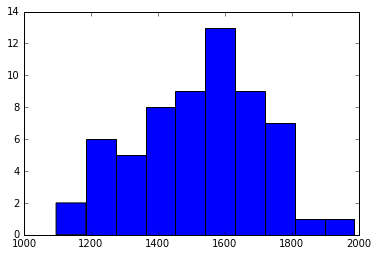

In [59]:
plt.hist(data.mortality)

In [116]:
# Quiz 1

In [83]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [86]:
def calc_conf_z(data):
    return _zconfint_generic(data.mean(), data.std(ddof=1)/scipy.sqrt(len(data)),0.05, 'two-sided')

In [87]:
calc_conf_z(data.mortality)

(1477.0525038218827, 1571.2425781453305)

In [113]:
def calc_conf_t(data):
    return _tconfint_generic(data.mean(), data.std(ddof=1)/np.sqrt(len(data)), len(data)-1, 0.05, 'two-sided')

In [114]:
calc_conf_t(data.mortality)

(1476.0833413552848, 1572.2117406119285)

In [98]:
from scipy.stats import t

In [102]:
def calc_conf_my_t(data):
    return (data.mean() - t.ppf(0.975,df=len(data)-1)*data.std(ddof=1)/scipy.sqrt(len(data)),
            data.mean() + t.ppf(0.975,df=len(data)-1)*data.std(ddof=1)/scipy.sqrt(len(data)))

In [103]:
calc_conf_my_t(data.mortality)

(1476.0833413552848, 1572.2117406119285)

In [74]:
def calc_conf_int(data):
    return (data.mean() - norm.ppf(0.975)*data.std(ddof=1)/scipy.sqrt(len(data)),
            data.mean() + norm.ppf(0.975)*data.std(ddof=1)/scipy.sqrt(len(data)))

In [107]:
conf_int = calc_conf_my_t(data.mortality)
print("Дов. интервала для сердней годовой смертности: {} , {}". format(conf_int[0], conf_int[1]))

Дов. интервала для сердней годовой смертности: 1476.08334136 , 1572.21174061


In [108]:
conf_int = calc_conf_my_t(data[data.location == 'South'].mortality)
print("Дов. интервала для сердней годовой смертности по южным городам: {} , {}". format(conf_int[0], conf_int[1]))

Дов. интервала для сердней годовой смертности по южным городам: 1320.15174629 , 1433.46363832


In [109]:
conf_int = calc_conf_my_t(data[data.location == 'North'].mortality)
print("Дов. интервала для сердней годовой смертности по северным городам: {} , {}". format(conf_int[0], conf_int[1]))

Дов. интервала для сердней годовой смертности по северным городам: 1586.5605252 , 1680.6394748


In [111]:
conf_int = calc_conf_my_t(data[data.location == 'South'].hardness)
print("Дов. интервала для сердней жесткости воды по южным городам: {} , {}". format(conf_int[0], conf_int[1]))

Дов. интервала для сердней жесткости воды по южным городам: 53.467198692 , 86.0712628464


In [112]:
conf_int = calc_conf_my_t(data[data.location == 'North'].hardness)
print("Дов. интервала для сердней жесткости воды по северным городам: {} , {}". format(conf_int[0], conf_int[1]))

Дов. интервала для сердней жесткости воды по северным городам: 21.4224872857 , 39.3775127143


In [80]:
import math

In [115]:
(norm.ppf(0.975)/0.1)**2

384.14588206941244

In [117]:
# Quiz 2

In [118]:
from statsmodels.stats.proportion import proportion_confint

In [120]:
proportion_confint(1, 50, method = 'normal', alpha=0.05)

(-0.018805307081790987, 0.058805307081790992)

In [121]:
proportion_confint(1, 50, method = 'wilson', alpha=0.05)

(0.0035392592716462362, 0.10495443589637815)

In [122]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [123]:
int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))

753

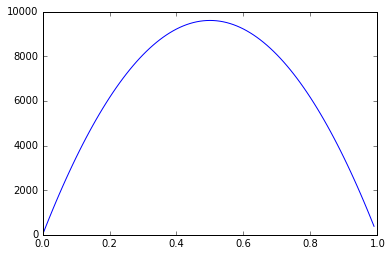

In [125]:
samples = np.arange(0,1,0.01)
size = map(lambda x: samplesize_confint_proportion(x, 0.01), samples)
plt.plot(samples,size)

In [127]:
int(np.ceil(np.max(size)))

9604

In [128]:
# Quiz 3

In [129]:
norm.ppf(0.9985)

2.9677379253417944

In [130]:
189.0/11034 - 104.0/11037

0.0077060239760047815

In [142]:
def proportions_confint_diff_ind(p1_count, p2_count, len_p1, len_p2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(p1_count) / len_p1
    p2 = float(p2_count) / len_p2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len_p1 + p2 * (1 - p2)/ len_p2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len_p1 + p2 * (1 - p2)/ len_p2)
    
    return (left_boundary, right_boundary)

In [143]:
proportions_confint_diff_ind(189, 104, 11034, 11037)

(0.0046877506750494392, 0.010724297276960124)

In [144]:
def odds(p):
    return p/(1-p)

In [145]:
p1 = float(189) / 11034
p2 = float(104) / 11037

In [147]:
odds(p1)/odds(p2)

1.8320539419087138

In [148]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [149]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [156]:
def get_odds(samples):
    p = float(np.sum(samples))/len(samples)
    return p/(1-p)

In [157]:
def gen_data(count,size):
    return np.array([1 if x<count else 0 for x in range(size)])

In [158]:
np.random.seed(0)

asp_data = gen_data(104,11037)
plac_data = gen_data(189,11034)

asp_odds = map(get_odds, get_bootstrap_samples(asp_data, 1000))
plac_odds = map(get_odds, get_bootstrap_samples(plac_data, 1000))

In [162]:
delta_odds = map(lambda x: x[1]/x[0], zip(asp_odds, plac_odds))

In [163]:
print "95% confidence interval for the difference between odds",  stat_intervals(delta_odds, 0.05)

95% confidence interval for the difference between odds [ 1.44419465  2.34321168]
